# Exploring Causation and Correlation

Author: Yamini Manral (manral.y@northeastern.edu)

Causal inference is a fundamental concept in many scientific fields, including statistics, medicine, economics, and social sciences. It focuses on determining **the causal impact of one variable on another**, going beyond mere correlation to establish a directional relationship. In other words, it seeks to answer the question: **does X cause Y?**

It is the process of determining whether a relationship between variables is cause-and-effect. It's an intellectual discipline that considers assumptions, study designs, and estimation strategies to draw causal conclusions from data<sup>1</sup>. It involves determining whether changes in one variable are responsible for the observed changes in another variable. Causal inference is crucial in various disciplines, including statistics, epidemiology, economics, political science, and machine learning.

## Causation and Correlation :

**Causation :**
Causation between random variables A and B implies that A and B have a cause-and-effect relationship with one another. Or we can say existence of one gives birth to other, and we say A causes B or vice versa. Causation is also termed as causality.

**Correlation :**
It is a statistical term which depicts the degree of association between two random variables. In data analysis it is often used to determine the amount to which they relate to one another.
1. Positive correlation – If with increase in random variable A, random variable B increases too, or vice versa.
2. Negative correlation –
If increase in random variable A leads to a decrease in B, or vice versa.
3. No correlation –
When both the variables are completely unrelated and change in one leads to no change in other. in other.

1. **Correlation vs. Causation:**
   - **Correlation:** Correlation refers to a statistical association between two variables. A correlation does not imply causation; it only indicates that changes in one variable are associated with changes in another. Spurious correlations, where variables appear correlated but are not causally related, highlight the importance of distinguishing between correlation and causation.
   - **Causation:** Causation implies a direct cause-and-effect relationship between variables. Establishing causation requires more rigorous analysis, as correlations can arise due to confounding factors or coincidence.

2. **Importance of Causality:**
   - Understanding causality is crucial in various fields, including public health, economics, social sciences, and policy-making.
   - Causal knowledge helps make informed decisions, design effective interventions, and predict the consequences of actions.
   - Without a grasp of causality, one may misinterpret data, leading to flawed conclusions and ineffective strategies.

3. **Causal Diagrams (Directed Acyclic Graphs - DAGs):**
   - Causal diagrams, often represented as DAGs, visually depict the causal relationships between variables.
   - DAGs help researchers articulate their assumptions about causal connections and guide the selection of variables to include in analyses.
   - They provide a transparent way to communicate complex causal structures and identify potential confounders.

In summary, causal inference involves a range of methods and concepts, from basic distinctions between correlation and causation to advanced techniques like DAGs, counterfactuals, and Bayesian approaches. Each sub-topic plays a crucial role in advancing our understanding of causal relationships in diverse fields.

### Spurious Correlation<sup>1 

A spurious correlation is a statistical relationship between two variables that appears to be causal but is not. This misleading relationship can arise due to two main factors:

**Coincidence:** Sometimes, two variables might appear to be correlated simply by chance. This is especially true when dealing with large datasets, where random fluctuations can create the illusion of a relationship.

**The presence of a lurking variable:** This is a third, unobserved variable that actually influences both of the variables you are measuring. The lurking variable creates the illusion of a causal relationship between the two observed variables, even though they are not directly related.

Below are some examples of spurious correlations as seen in real life. **But one should never mistake coincidence with correlation.**

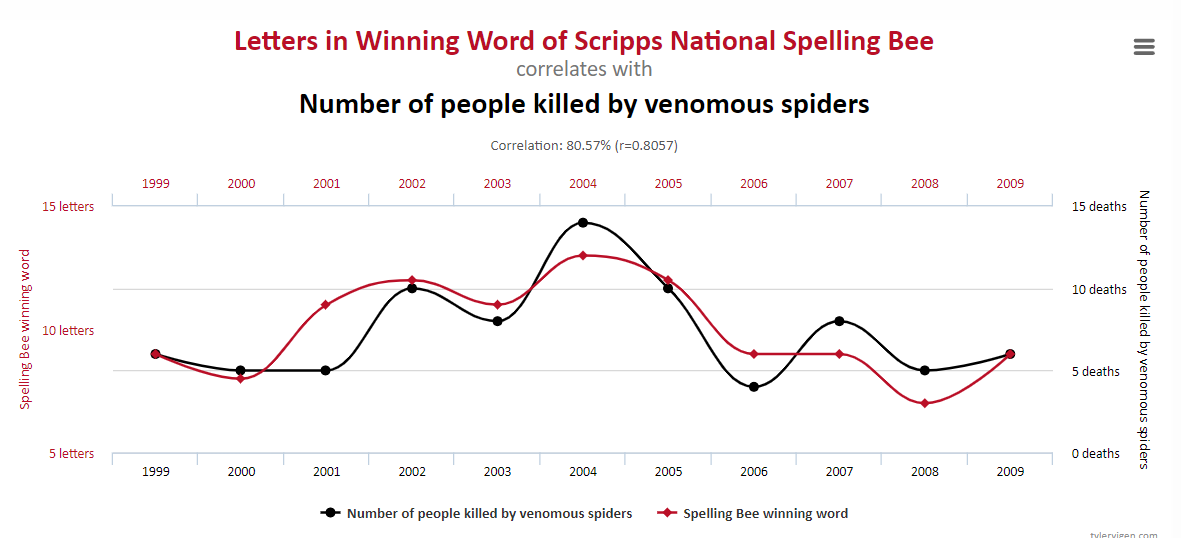

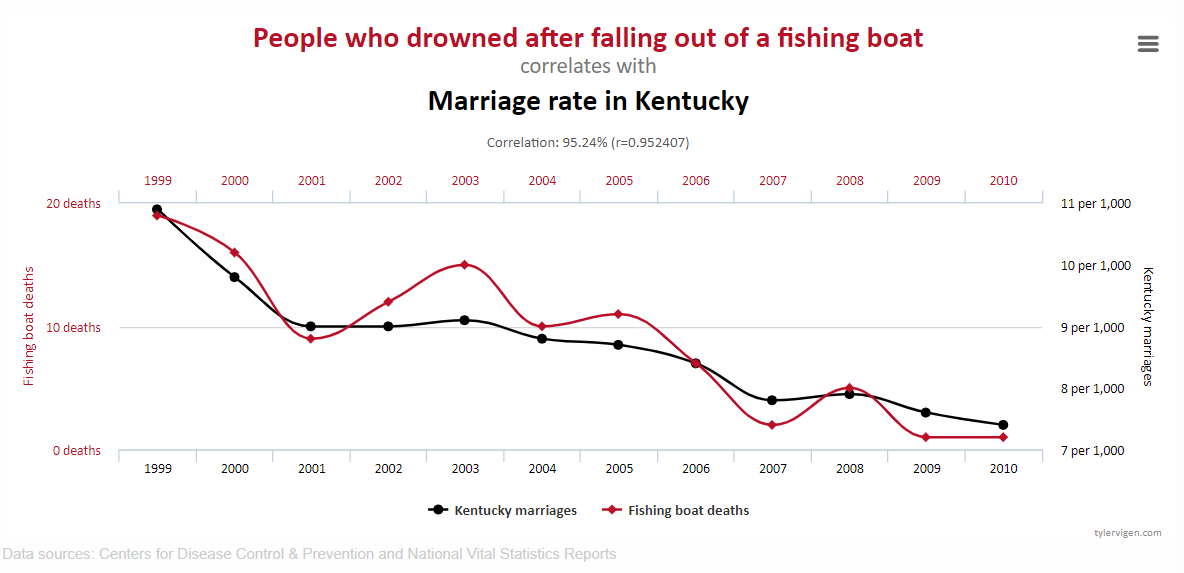

## What are DAGs?

A DAG stands for Directed Acyclic Graph. It's a way of representing relationships between different variables or tasks in a clear and organized manner.

**Directed:** This means that the edges in a DAG have arrows, indicating the direction of the relationship. For example, an arrow pointing from A to B indicates that A has an influence on B, but not vice versa.

**Acyclic:** This means that there are no cycles in the graph. In simpler terms, you can't follow the arrows around the graph and end up back where you started. This ensures that the relationships are well-defined and there are no circular dependencies.

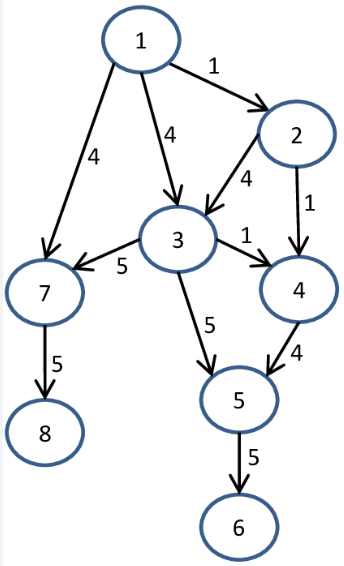

Overall, DAGs are a powerful tool for visualizing and managing complex relationships. They are widely used in various fields for their clarity, efficiency, and ease of understanding. I will use DAGs to show possible causal relationships between variables.

## Correlation between writng, reading and math scores in students<sup>2 
### Writing <-- Math <--> Reading ??

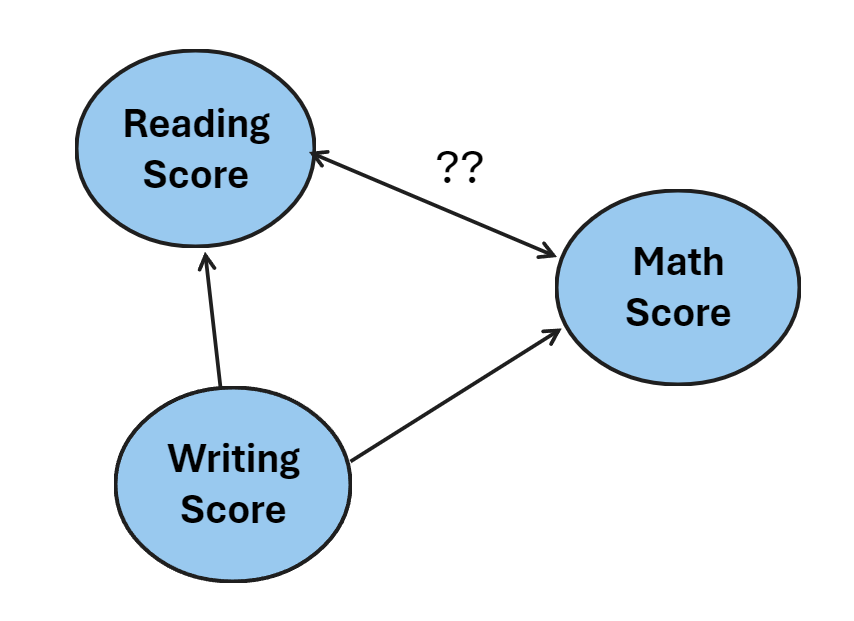

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading dataset<sup>4 

In [3]:
df = pd.read_csv("INFO_7390_Art_and_Science_of_Data\CSV\stud_perf_exam.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [6]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [7]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [8]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

## Visualization<sup>5

Following is some vizualization using pairplots which shows how the three variables (math, reading and writing scores) interact with other variables present e.g. gender, race/ethnicity, parental level of education, lunch and, test preparation course.

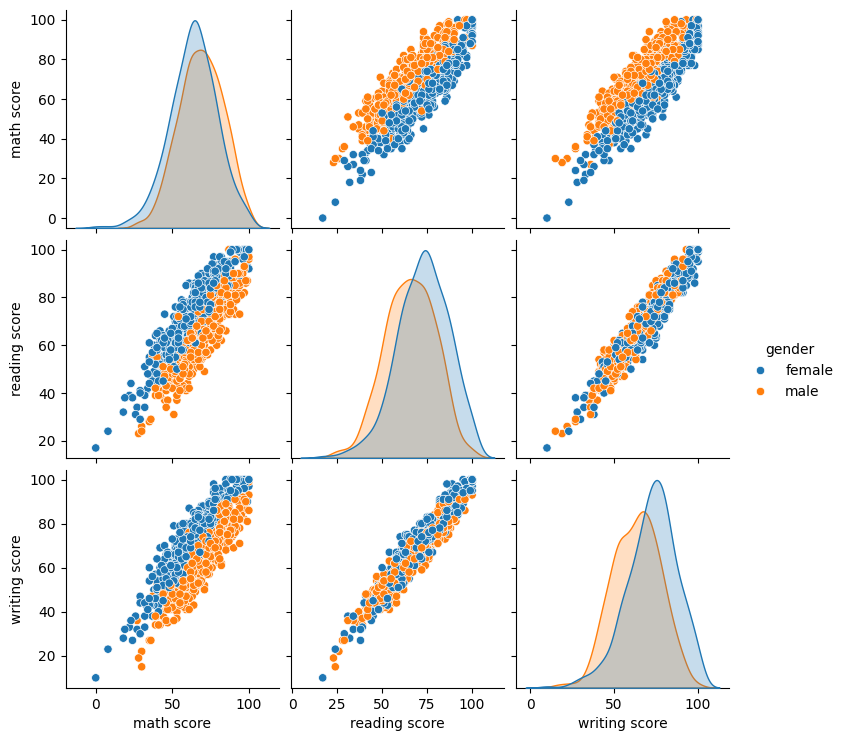

In [9]:
# Pairplot by gender
sns.pairplot(df,hue='gender');

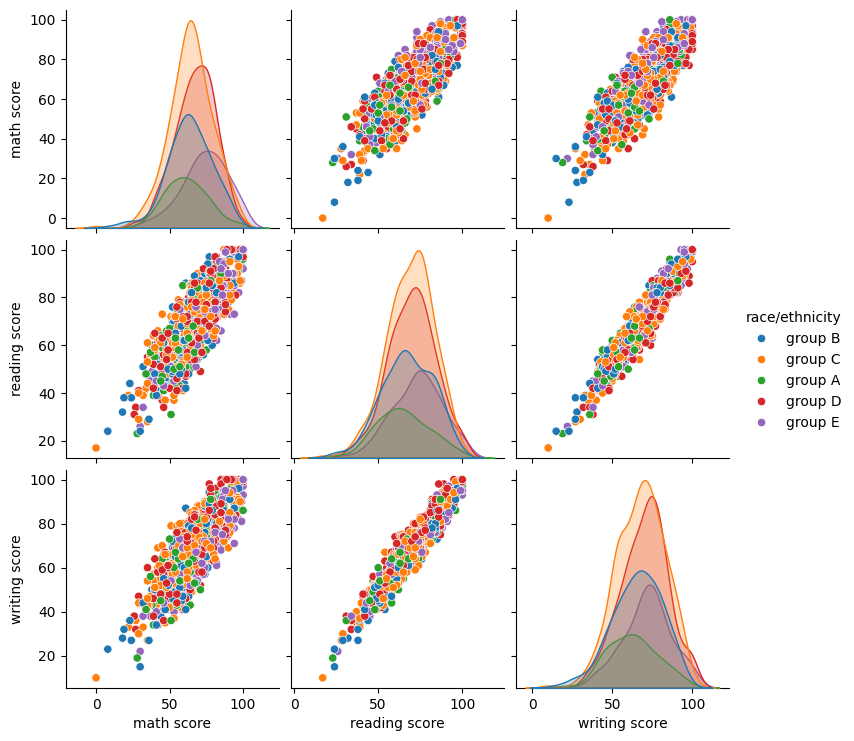

In [10]:
#  Pairplot by race/ethnicity
sns.pairplot(df,hue='race/ethnicity');

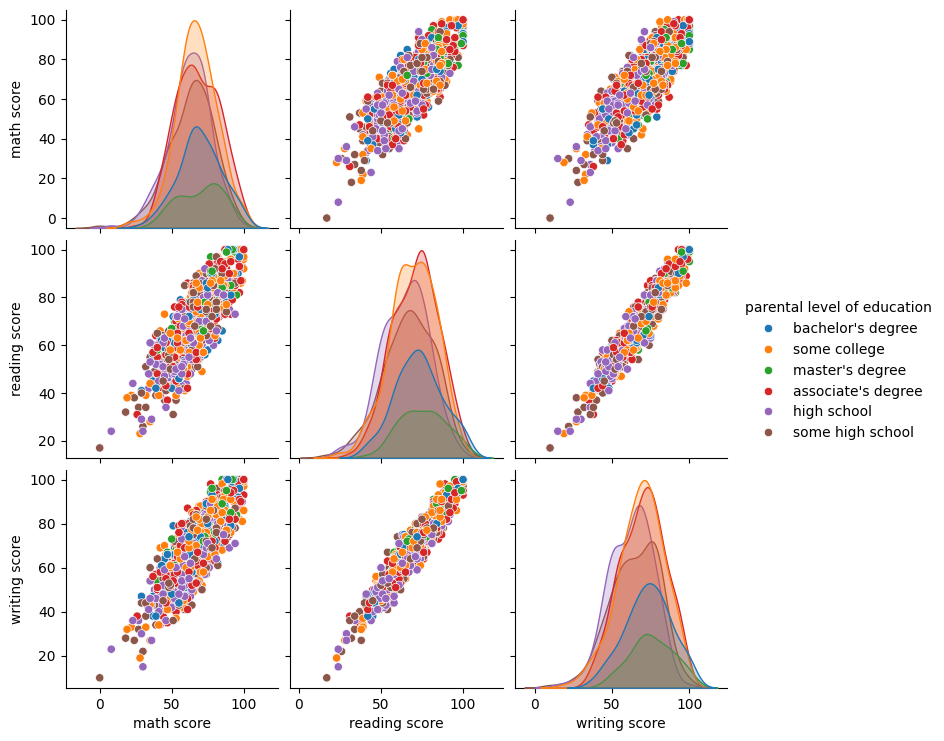

In [11]:
# Pairplot by parental level of education
sns.pairplot(df,hue='parental level of education');

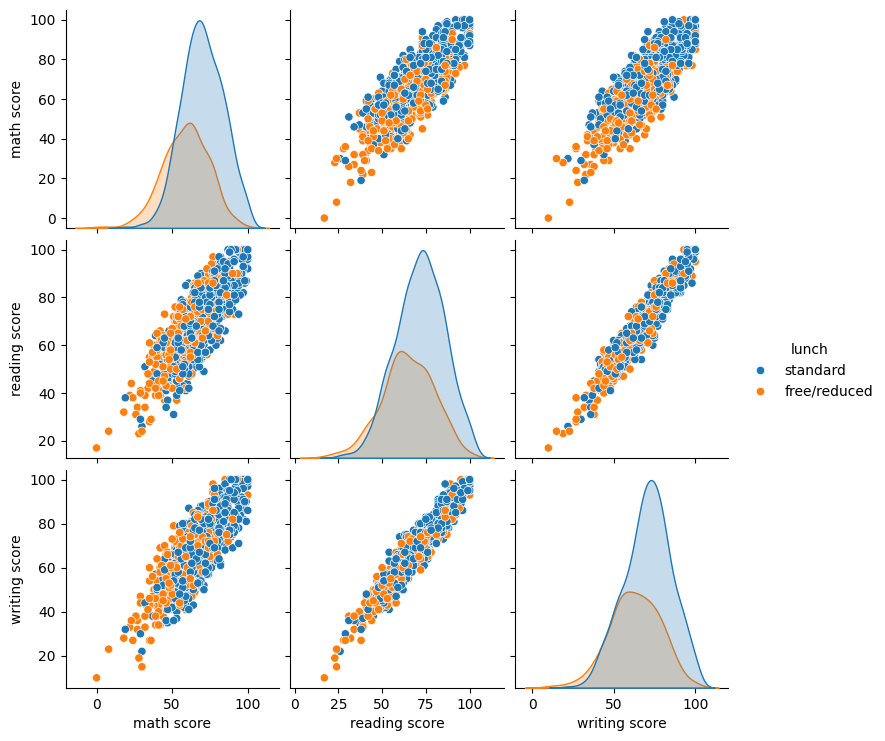

In [12]:
# Pairplot by lunch
sns.pairplot(df,hue='lunch');

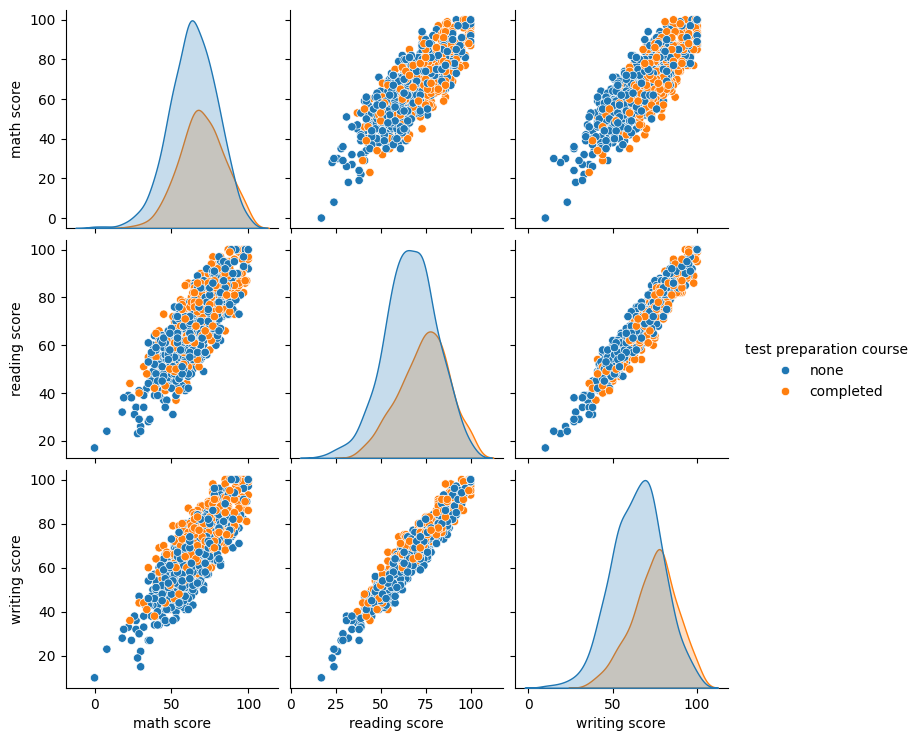

In [13]:
# Pairplot by test preparation course
sns.pairplot(df,hue='test preparation course');

## Boxplot 

Below I will use boxplots for each of the variables e.g. math, reading and writing score, to see how they change for each of the other variables in the database.

In [14]:
cat_col=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
num_col=[ 'math score', 'reading score', 'writing score']

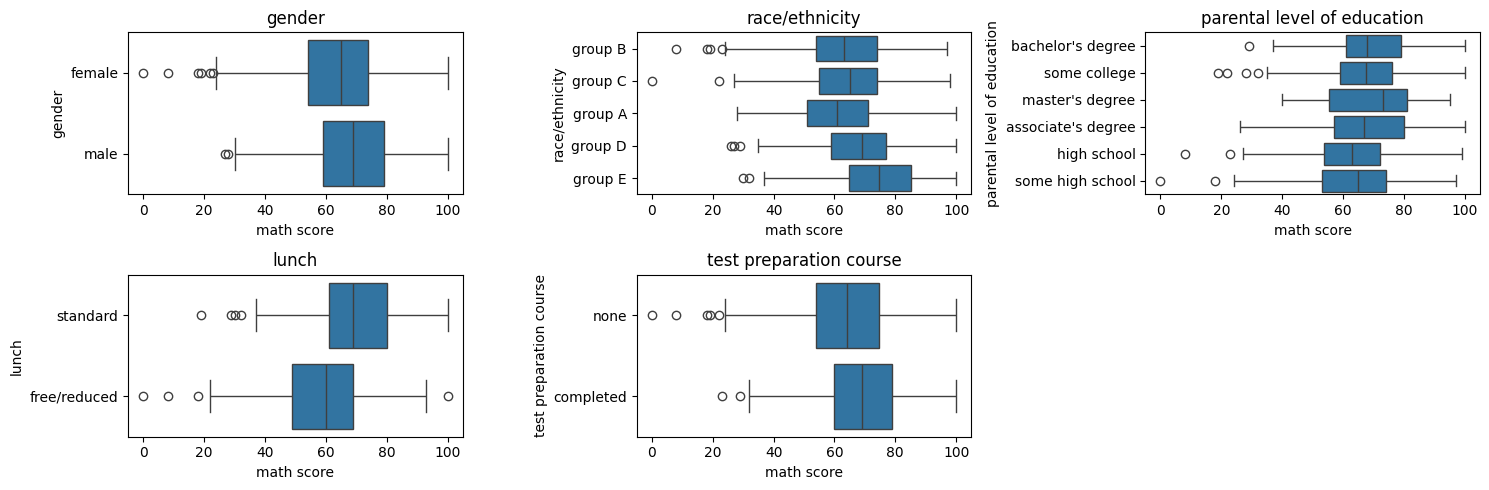

In [15]:
fig = plt.figure(figsize=(15,5))

for i in range(len(cat_col)):
    plt.subplot(2,3,i+1)
    plt.title(cat_col[i])
    sns.boxplot(data=df,y=df[cat_col[i]],x=df['math score'])
plt.tight_layout()
plt.show()

### Interpretions:
1. Lowest math scores are from females.
2. Lowest math scores are from group B and the highest are from group A.
3. Kids with parents that have master's degree maintain better scores than all others.
4. Students who completed test preparation course tend to perform better than who did not. 

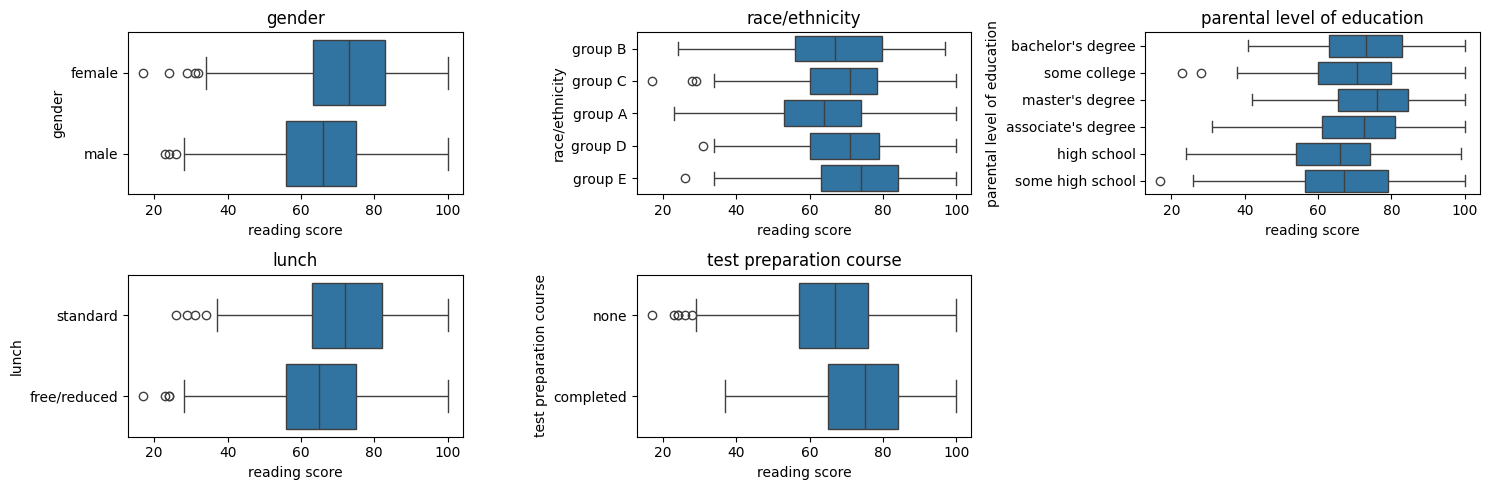

In [16]:
# Boxplot - reading score by categorical features
fig = plt.figure(figsize=(15,5))

for i in range(len(cat_col)):
    plt.subplot(2,3,i+1)
    plt.title(cat_col[i])
    sns.boxplot(data=df,y=df[cat_col[i]],x=df['reading score'])
plt.tight_layout()
plt.show()

### Interpretions:

1. Lowest reading scores are from males.
2. Lowest reading scores are from group A.
3. Students with parents that have high school degree have some of the worst scores, whereas students with parents having master's degree maintain better scores than all others.
4. Students who completed test preparation course tend to perform better than who did not.

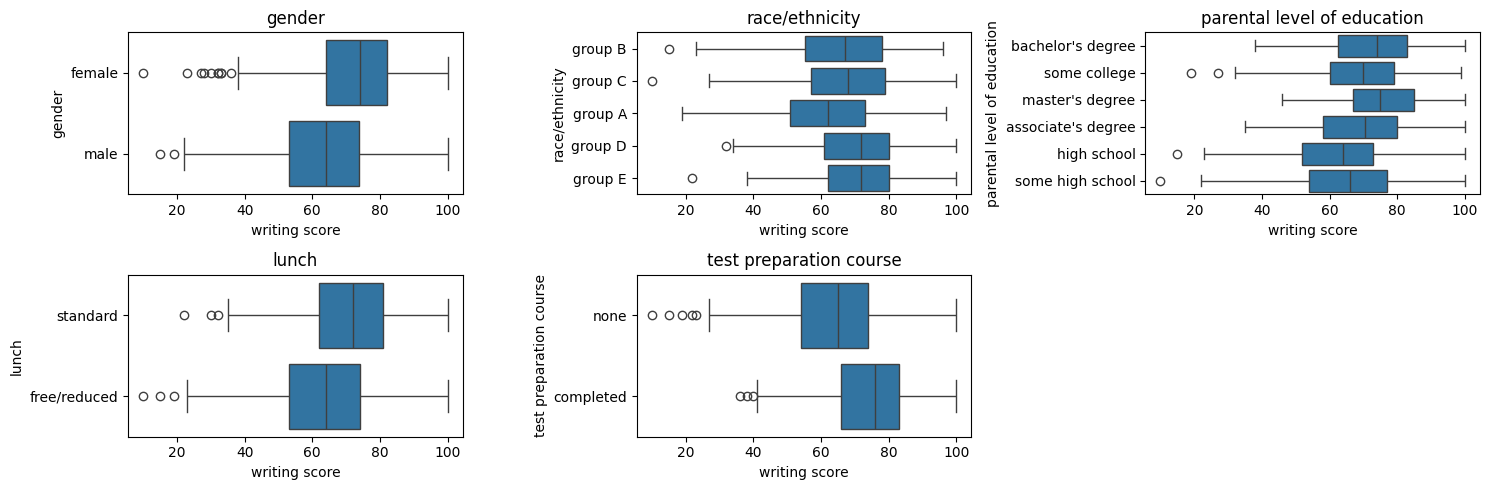

In [17]:
# Boxplot - writing score by categorical features
fig = plt.figure(figsize=(15,5))

for i in range(len(cat_col)):
    plt.subplot(2,3,i+1)
    plt.title(cat_col[i])
    sns.boxplot(data=df,y=df[cat_col[i]],x=df['writing score'])
plt.tight_layout()
plt.show()

### Interpretation:

1. Lowest writing scores are from males.
2. Lowest reading scores are from group A.
3. Students with parents that have master's degree maintain better scores than all others, whereas students whose parents have high school degree have some of the worst marks.
4. Students who completed test preparation course tend to perform much better than who did not.

## Correlation Matrix


A **correlation matrix** is a square table that summarizes the relationships between pairs of variables in a dataset. It displays the correlation coefficient for each pair of variables, which is a measure of the strength and direction of the linear relationship between them.

The correlation matrix provided shows the correlation coefficients between three variables: math score, reading score, and writing score. The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. It can range from -1 to 1, with a value of 0 indicating no correlation, a value of 1 indicating a perfect positive correlation, and a value of -1 indicating a perfect negative correlation.

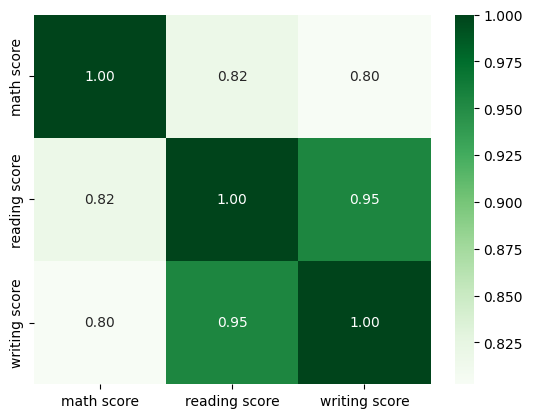

In [22]:
# Correlation heatmap
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='Greens', fmt='.2f');

### Interpretation of the Correlation Matrix

The correlation matrix shows that all three variables are strongly positively correlated, meaning that students who tend to perform well in one subject also tend to perform well in the others. The correlation between math and reading scores is the strongest (r = 0.87), followed by the correlation between math and writing scores (r = 0.79), and then the correlation between reading and writing scores (r = 0.68).

These findings suggest that there is a strong relationship between math, reading, and writing skills. This is likely due to a number of factors, such as the fact that all three subjects require similar cognitive skills, such as critical thinking, problem-solving, and language comprehension. Additionally, students who are motivated to achieve in one of these subjects may also be motivated to achieve in the others.

Overall, the correlation matrix suggests that students who perform well in math are also likely to perform well in reading and writing. 

## Causal Inference by LiNGAM<sup>5

### What is LiNGAM?
The Linear Non-Gaussian Acyclic Model (LiNGAM) is a statistical model used in the field of causal inference to estimate the underlying causal structure of a system from observational data. It falls under the broader category of Structural Equation Models (SEMs) and is designed to identify causal relationships among variables in a linear system where the variables are not necessarily Gaussian distributed.

Here are the key components and concepts associated with LiNGAM:

1. **Linearity:**
   - LiNGAM assumes that the relationships between variables are linear. This means that the influence of one variable on another is represented by a linear equation.

2. **Non-Gaussianity:**
   - LiNGAM relies on the non-Gaussianity of the observed variables. Traditional methods like linear regression often assume Gaussian (normal) distribution, but LiNGAM works well when dealing with variables that are not normally distributed.

3. **Acyclic Structure:**
   - The term "Acyclic" implies that the causal relationships among variables do not form cycles. This acyclic structure is crucial for identifying a clear direction of causality.

4. **Identification of Causal Direction:**
   - LiNGAM aims to estimate the causal direction between variables. It helps identify which variable in a system is causing changes in another variable, based on statistical properties observed in the data.

5. **Independent Components:**
   - LiNGAM assumes that the components (variables) are statistically independent. This independence assumption is essential for separating the effects of different variables and inferring causality.

6. **Applications:**
   - LiNGAM has been applied in various fields, including economics, neuroscience, and systems biology. In neuroscience, for example, it has been used to infer the direction of information flow in brain networks.

The key idea behind LiNGAM is to exploit the statistical properties of non-Gaussianity to identify the direction of causality. Various algorithms and methods have been developed for estimating LiNGAM structures from observational data, and these methods often involve techniques such as independent component analysis (ICA) or other statistical approaches.

Below we aim to discover the causal relationships among math score, reading score, and writing score using a DirectLiNGAM model. It preprocesses the data, defines prior knowledge, trains the model, and visualizes the resulting causal graph.

In [23]:
# Importing
from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

In [24]:
#  Data Preprocessing
oe = ce.ordinal.OrdinalEncoder(
    cols=df.select_dtypes(include="object")
    )

df_en = oe.fit_transform(df)

The resulting DataFrame (df_en) contains the original columns along with newly created columns representing the ordinal encoding of categorical variables.

In [25]:
df_list = df.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

8
{'gender': 0, 'race/ethnicity': 1, 'parental level of education': 2, 'lunch': 3, 'test preparation course': 4, 'math score': 5, 'reading score': 6, 'writing score': 7}


In [26]:
#  Setting prior knowledge
prior_knowledge = make_prior_knowledge(
    8,
    paths = [
             [df_dict["math score"], df_dict["reading score"],df_dict['writing score']
             ]],
                           
)

Specifies that math score might influence both reading and writing scores, but not vice versa.

In [27]:
# lingam modeling

model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df_en)

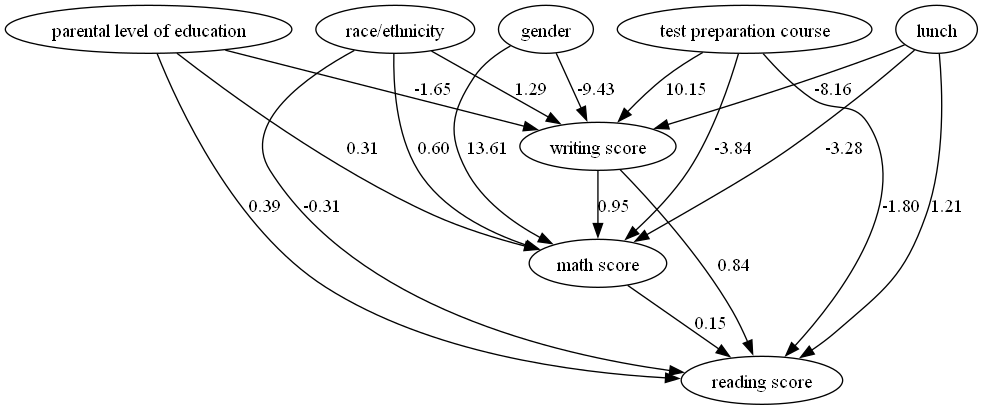

In [28]:
dot = make_dot(
    model.adjacency_matrix_,
     labels=df_en.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

This graph shows how the variables affect each other based on the model's findings.

According to the DAG, math score has a causal effect on both reading score and writing score, while reading score has a causal effect on writing score. This means that:

* Students who have higher math scores are likely to have higher reading scores and writing scores.
* Students who have higher reading scores are likely to have higher writing scores.

The code below extends the previous analysis by leveraging the **fitted linear regression model** to predict "writing score" and incorporate that information into the visualized causal graph. This provides a more comprehensive understanding of the relationships between the variables and how they might influence each other, leading to better prediction of writing score based on the other features.

In [29]:
# LiNGAM with Linear Regression (Target Variable : "writing score")
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model
reg = LinearRegression(fit_intercept=True)

# Training the model
reg.fit(df_en.drop(["writing score"], axis=1), df_en["writing score"])

LinearRegression()

This part creates a list called features containing the indices of all columns in the DataFrame df_en except the "writing score" column.

features:  [0, 1, 2, 3, 4, 5, 6]


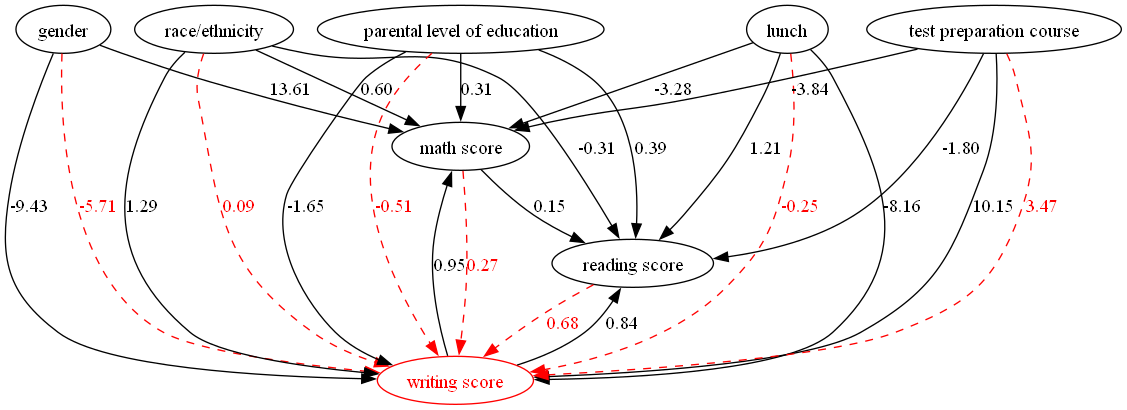

In [30]:
features = [i for i in range(df_en.drop(["writing score"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features, 
    prediction_target_label='writing score',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

## Insights 

* Math score has causal effect on reading score, likely because math and reading skills share some common cognitive skills, such as critical thinking and problem-solving. 

* Math score has causal effect on writing score, likely because math skills can help students to write more clearly and concisely.

* Reading score has a causal effect on writing score, likely because reading skills can help students to write more effectively and communicate their ideas more clearly.

* The feedback loop between reading score and writing score indicates that these two variables have a mutually reinforcing relationship. This means that students who have higher reading scores are likely to improve their writing scores, and students who have higher writing scores are likely to improve their reading scores.

### My interpretation

It's reasonable to assume that math score and reading score may be correlated or affected by writing score, especially since writing score has a high coefficient. 

## References

1. [Spurious correlations](https://www.tylervigen.com/spurious-correlations)
2. ["What is the importance of reading and writing in the math curriculum?" by DRA Newsletter](https://www.idra.org/resource-center/what-is-the-importance-of-reading-and-writing-in-the-math-curriculum/)
3. ["Water Quality Causal Inference by LiNGAM" by Tetsuya Sasaki](https://www.kaggle.com/code/sasakitetsuya/water-quality-causal-inference-by-lingam)
4. [How the Student's Test Scores are affected ](https://www.kaggle.com/datasets/sanutribedi/how-the-students-test-scores-are-affected)
5. [Causal Inference | Reading⇔Math→Writing?](https://www.kaggle.com/code/sasakitetsuya/causal-inference-reading-math-writing)
6. [Causal Inference](https://www.sciencedirect.com/topics/social-sciences/causal-inference#:~:text=Causal%20inference%20refers%20to%20an,causal%20conclusions%20based%20on%20data.)

## MIT License



Copyright (c) 2023 Yamini Manral

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
